In [28]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import sklearn
import seaborn as sns
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score,accuracy_score
import warnings
warnings.filterwarnings('ignore')

In [29]:
df=pd.read_excel('shoe.xlsx')

In [30]:
df.head()

,size(cm),class(y)
0,9.500,Female
1,10.125,Male
2,10.410,Male
3,9.810,Female
4,11.050,Male


In [31]:
df.describe()

,size(cm)
count,40.000000
mean,10.067375
std,0.532646
min,9.150000
25%,9.615000
50%,10.137500
75%,10.482500
max,11.050000


# Encoding

In [32]:
from sklearn.preprocessing import LabelEncoder

In [33]:
le=LabelEncoder()

In [34]:
df['class(y)']=le.fit_transform(df['class(y)'])

In [35]:
df.head()

,size(cm),class(y)
0,9.500,0
1,10.125,1
2,10.410,1
3,9.810,0
4,11.050,1


# Split X,Y

In [36]:
x=df[['size(cm)']]
x.head()

,size(cm)
0,9.500
1,10.125
2,10.410
3,9.810
4,11.050


In [37]:
y=df[['class(y)']]
y.head()

,class(y)
0,0
1,1
2,1
3,0
4,1


In [38]:
from sklearn.model_selection import train_test_split as tts

In [59]:
xtrain,xtest,ytrain,ytest=tts(x,y,test_size=0.3,random_state=42)

In [60]:
xtrain.head()

,size(cm)
13,10.91
31,9.91
34,10.16
8,9.71
17,9.93


In [61]:
xtest.head()

,size(cm)
19,10.59
16,10.02
15,10.73
26,10.29
4,11.05


# Decision Tree Algorithm

In [62]:
from sklearn.tree import DecisionTreeClassifier

In [63]:
tr=DecisionTreeClassifier()

In [64]:
tr.fit(xtrain,ytrain)

DecisionTreeClassifier()

In [65]:
pred_tree=tr.predict(xtest)

# Accuracy,MAE,MSE(Using Decision Tree)

In [68]:
accuracy_tree=accuracy_score(ytest,pred_tree)
print("Accuracy of Decision Tree:",accuracy_tree)

Accuracy of Decision Tree: 0.9166666666666666


In [69]:
mae_tree=mean_absolute_error(ytest,pred_tree)
print("MAE of Decision Tree:",mae_tree)

MAE of Decision Tree: 0.08333333333333333


In [70]:
mse_tree=mean_squared_error(ytest,pred_tree)
print("MSE of Decision Tree:",mse_tree)

MSE of Decision Tree: 0.08333333333333333


# K-NN Algorithm 

In [71]:
from sklearn.neighbors import KNeighborsClassifier

In [72]:
kn=KNeighborsClassifier()

In [73]:
kn.fit(xtrain,ytrain)

KNeighborsClassifier()

In [74]:
pred_KN=kn.predict(xtest)

# Accuracy,MAE,MSE(Using K-NN)

In [75]:
accuracy_KN=accuracy_score(ytest,pred_KN)
print("Accuracy of Decision Tree:",accuracy_KN)

Accuracy of Decision Tree: 0.9166666666666666


In [76]:
mae_KN=mean_absolute_error(ytest,pred_KN)
print("MAE of Decision Tree:",mae_KN)

MAE of Decision Tree: 0.08333333333333333


In [77]:
mse_KN=mean_squared_error(ytest,pred_KN)
print("MSE of Decision Tree:",mse_KN)

MSE of Decision Tree: 0.08333333333333333


# Logistic Regression Algorithm

In [78]:
from sklearn.linear_model import LogisticRegression

In [79]:
reg=LogisticRegression()

In [80]:
reg.fit(xtrain,ytrain)

LogisticRegression()

In [81]:
pred_log=reg.predict(xtest)

# Accuracy,MAE,MSE(Using Logistic Regression)

In [85]:
accuracy_log=accuracy_score(ytest,pred_log)
print("Accuracy of Decision Tree:",accuracy_log)

Accuracy of Decision Tree: 0.9166666666666666


In [86]:
mae_log=mean_absolute_error(ytest,pred_log)
print("MAE of Decision Tree:",mae_log)

MAE of Decision Tree: 0.08333333333333333


In [87]:
mse_log=mean_squared_error(ytest,pred_log)
print("MSE of Decision Tree:",mse_log)

MSE of Decision Tree: 0.08333333333333333


# Data Frame

In [88]:
data={'Name':['Decision Tree Accuracy','Decision Tree MAE','Decision Tree MSE','K-NN Accuracy','K-NN MAE','K-NN MSE',
             'Logistic Regression Accuracy','Logistic Regression MAE','Logistic Regression MSE'],
     'Value':[accuracy_tree,mae_tree,mse_tree,accuracy_KN,mae_KN,mse_KN,accuracy_log,mae_log,mse_log]}

In [89]:
df_after_predict=pd.DataFrame(data=data)

In [92]:
df_after_predict.head(9)

,Name,Value
0,Decision Tree Accuracy,0.916667
1,Decision Tree MAE,0.083333
2,Decision Tree MSE,0.083333
3,K-NN Accuracy,0.916667
4,K-NN MAE,0.083333
5,K-NN MSE,0.083333
6,Logistic Regression Accuracy,0.916667
7,Logistic Regression MAE,0.083333
8,Logistic Regression MSE,0.083333


<Axes: xlabel='Value', ylabel='Name'>

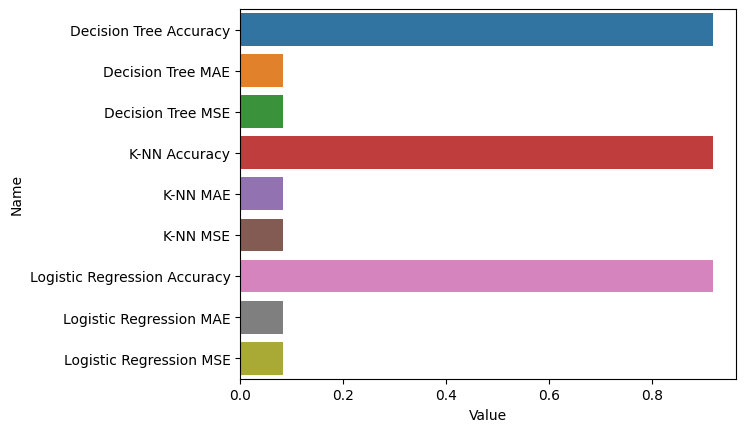

In [93]:
sns.barplot(x='Value',y='Name',data=df_after_predict)

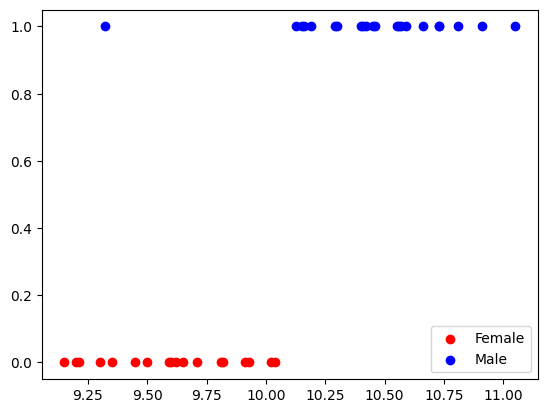

In [95]:
df0=df[df['class(y)']==0]
df1=df[df['class(y)']==1]

plt.scatter(df0["size(cm)"],df0["class(y)"],color='red',label='Female')
plt.scatter(df1["size(cm)"],df1["class(y)"],color='blue',label='Male')
plt.legend()